# Linear Regression Practicals on Stock Prediction Dataset

## Practical 1: Simple Linear Regression
- Dataset: Stock Closing Prices (e.g., TVSMOTOR.NS)
- Feature: Day number (time index)
- Target: Closing Price
- Task: Fit a simple regression line and evaluate using MSE, RMSE, R²

/var/folders/26/ff0xxzbd731d59yvrvgz3jgm0000gn/T/ipykernel_46586/1921283898.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TVSMOTOR.NS", start="2022-01-01", end="2025-08-30")
[*********************100%***********************]  1 of 1 completed

MSE: 32791.43045298584
RMSE: 181.0840425133751
R²: 0.9442902984629994


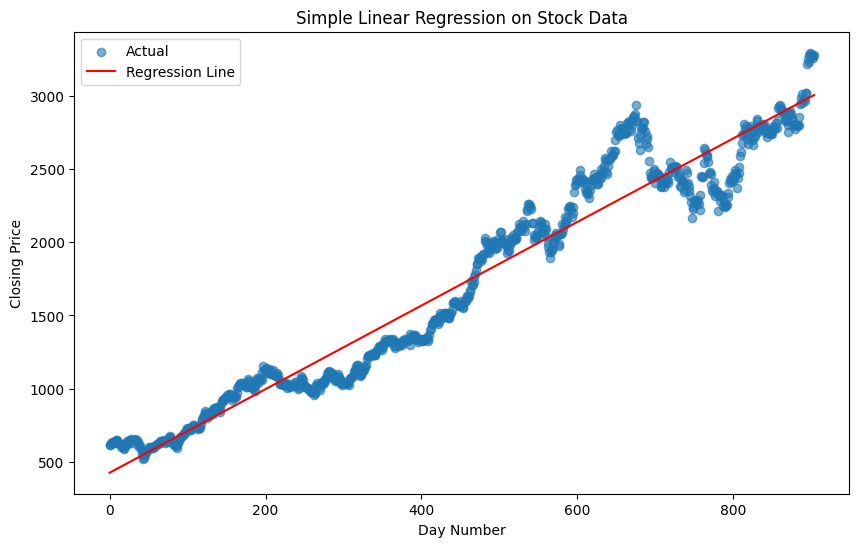

In [1]:

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Download stock data
data = yf.download("TVSMOTOR.NS", start="2022-01-01", end="2025-08-30")
data.reset_index(inplace=True)

# Feature: day number, Target: closing price
data['Day'] = np.arange(len(data))
X = data[['Day']]
y = data['Close']

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Actual", alpha=0.6)
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("Day Number")
plt.ylabel("Closing Price")
plt.legend()
plt.title("Simple Linear Regression on Stock Data")
plt.show()


## Practical 2: Gradient Descent Implementation
- Implement Linear Regression manually using Gradient Descent
- Visualize cost function convergence

/Users/jayantparmar/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/26/ff0xxzbd731d59yvrvgz3jgm0000gn/T/ipykernel_46586/3959314546.py:21: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum(error**2)
/var/folders/26/ff0xxzbd731d59yvrvgz3jgm0000gn/T/ipykernel_46586/3959314546.py:19: RuntimeWarning: invalid value encountered in scalar subtract
  theta0 -= alpha * (1/m) * np.sum(error)
/var/folders/26/ff0xxzbd731d59yvrvgz3jgm0000gn/T/ipykernel_46586/3959314546.py:20: RuntimeWarning: invalid value encountered in multiply
  theta1 -= alpha * (1/m) * np.sum(error * X_norm.flatten())
/Users/jayantparmar/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Final Theta0: nan
Final Theta1: nan


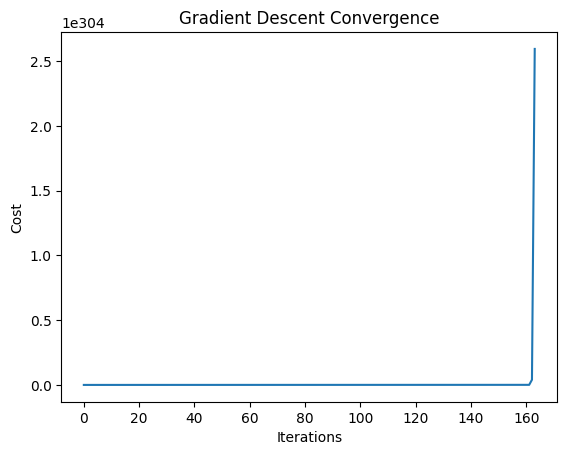

In [2]:

# Gradient Descent implementation for stock prices
X = data['Day'].values.reshape(-1,1)
y = data['Close'].values

# Normalize features
X_norm = (X - X.mean()) / X.std()

# Hyperparameters
alpha = 0.01
iterations = 1000
m = len(y)
theta0, theta1 = 0, 0

cost_history = []

for _ in range(iterations):
    y_pred = theta0 + theta1 * X_norm.flatten()
    error = y_pred - y
    theta0 -= alpha * (1/m) * np.sum(error)
    theta1 -= alpha * (1/m) * np.sum(error * X_norm.flatten())
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)

print("Final Theta0:", theta0)
print("Final Theta1:", theta1)

# Plot cost convergence
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Convergence")
plt.show()


## Practical 3: Multivariate Linear Regression
- Features: Open, High, Low, Volume
- Target: Close
- Train Linear Regression and evaluate

In [ ]:

features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Close']

model_multi = LinearRegression()
model_multi.fit(X, y)
y_pred_multi = model_multi.predict(X)

mse_multi = mean_squared_error(y, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y, y_pred_multi)

print("Multivariate MSE:", mse_multi)
print("Multivariate RMSE:", rmse_multi)
print("Multivariate R²:", r2_multi)


## Practical 4: Polynomial Regression
- Feature: Day number
- Compare Linear vs Polynomial Regression (degree 2, 3)

In [ ]:

from sklearn.preprocessing import PolynomialFeatures

X = data[['Day']]
y = data['Close']

plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Actual Data", alpha=0.6)

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y)
    y_poly_pred = model_poly.predict(X_poly)
    plt.plot(X, y_poly_pred, label=f"Degree {degree}")

plt.xlabel("Day Number")
plt.ylabel("Closing Price")
plt.title("Polynomial Regression on Stock Data")
plt.legend()
plt.show()


## Practical 5: Regularized Regression (Ridge & Lasso)
- Features: Open, High, Low, Volume
- Apply Ridge and Lasso regression

In [ ]:

from sklearn.linear_model import Ridge, Lasso

features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Close']

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X, y)
lasso.fit(X, y)

print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)



## Practical 6: Feature Engineering for Better Accuracy

We improve stock price prediction by adding **lag features, moving averages, volatility, and returns** to provide more context to the model.


MSE with Feature Engineering: 192.77470135963907
RMSE with Feature Engineering: 13.88433294615334
R² with Feature Engineering: 0.9973963232053057


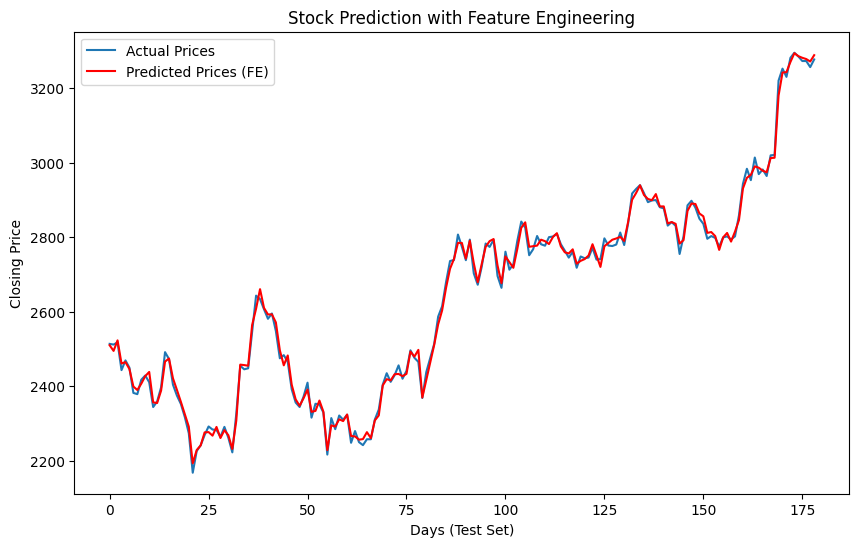

In [3]:

# Feature Engineering
data['Close_lag1'] = data['Close'].shift(1)
data['Close_lag2'] = data['Close'].shift(2)
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA14'] = data['Close'].rolling(window=14).mean()
data['Volatility'] = data['Close'].rolling(window=7).std()
data['Return'] = data['Close'].pct_change()

# Drop NaN values caused by rolling/lagging
data_fe = data.dropna()

# Features and target
features = ['Open', 'High', 'Low', 'Volume',
            'Close_lag1', 'Close_lag2',
            'MA7', 'MA14', 'Volatility', 'Return']
X = data_fe[features]
y = data_fe['Close']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Linear Regression with engineered features
model_fe = LinearRegression()
model_fe.fit(X_train, y_train)

# Predictions
y_pred_fe = model_fe.predict(X_test)

# Evaluation metrics
mse_fe = mean_squared_error(y_test, y_pred_fe)
rmse_fe = np.sqrt(mse_fe)
r2_fe = r2_score(y_test, y_pred_fe)

print("MSE with Feature Engineering:", mse_fe)
print("RMSE with Feature Engineering:", rmse_fe)
print("R² with Feature Engineering:", r2_fe)

# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual Prices")
plt.plot(y_pred_fe, label="Predicted Prices (FE)", color="red")
plt.xlabel("Days (Test Set)")
plt.ylabel("Closing Price")
plt.title("Stock Prediction with Feature Engineering")
plt.legend()
plt.show()
